## Importing libraries

In [11]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the data with Pandas

In [29]:
with gzip.open('query.bed.gz', 'rt') as f:
    df = pd.read_csv(f, sep='\t', header=None, usecols=[1, 2], names=['start', 'end'])

In [31]:
df.head(15)

,start,end
0,32795245,32795315
1,95864728,95864770
2,32027808,32027880
3,76608451,76608515
4,45847777,45847816
5,15479896,15479934
6,16453378,16453483
7,20657878,20657958
8,36904626,36904682
9,99905415,99905569


##  Calculating fragment lengths :(end - start)

In [37]:
df['length'] = df['end'] - df['start']
df['length']

0            70
1            42
2            72
3            64
4            39
           ... 
13835732    137
13835733    184
13835734     47
13835735    104
13835736     56
Name: length, Length: 13835737, dtype: int64

## Frequnecies

In [44]:
freq=df['length'].value_counts().sort_values()
print(freq)

length
699        64
696        71
700        72
697        73
683        77
        ...  
42     158157
53     158272
41     158852
51     160374
52     160866
Name: count, Length: 677, dtype: int64


## Normalizing frequencies by total_count

In [51]:
normalized_freq=freq/freq.sum()
print(normalized_freq)

length
699    0.000005
696    0.000005
700    0.000005
697    0.000005
683    0.000006
         ...   
42     0.011431
53     0.011439
41     0.011481
51     0.011591
52     0.011627
Name: count, Length: 677, dtype: float64


## Plots

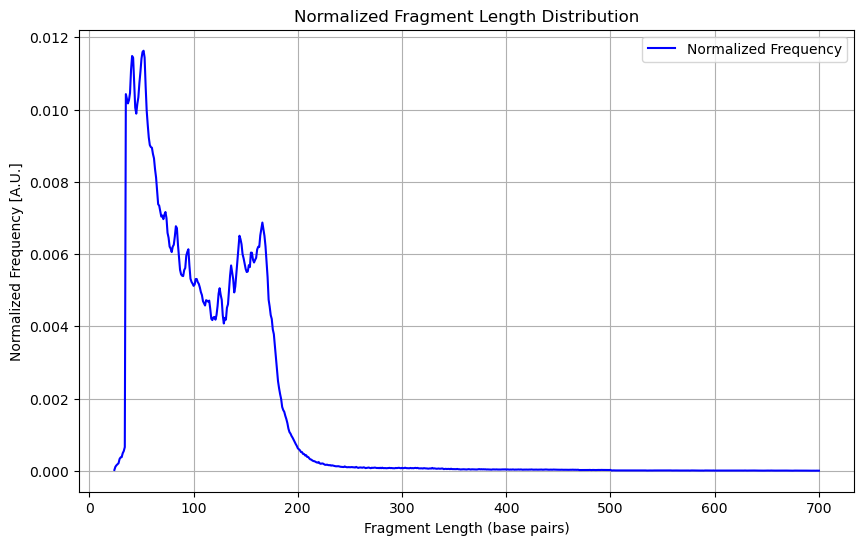

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(normalized_frequencies.index, normalized_frequencies.values, 'b-', label='Normalized Frequency')
plt.xlabel('Fragment Length (base pairs)')
plt.ylabel('Normalized Frequency [A.U.]')
plt.title('Normalized Fragment Length Distribution')
plt.grid(True)
plt.legend()

## Scatter-plot

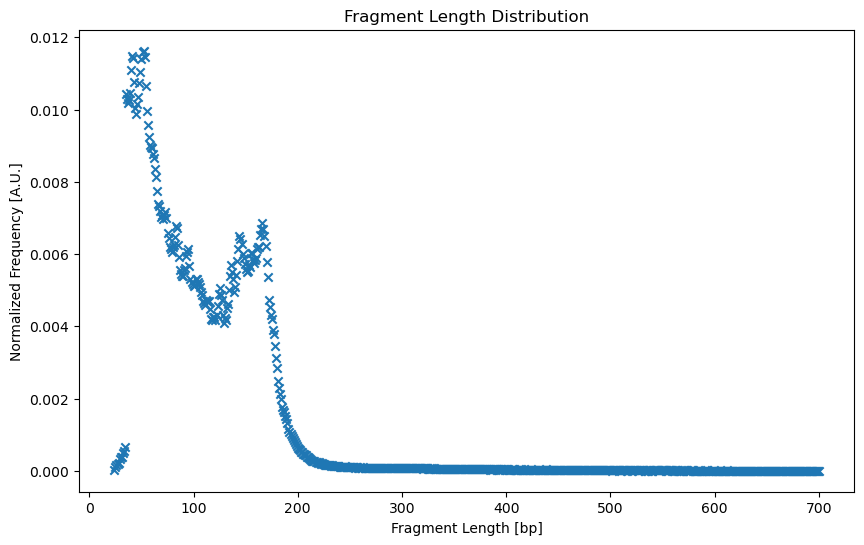

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(normalized_freq.index,normalized_freq.values,marker='x')
plt.xlabel("Fragment Length [bp]")
plt.ylabel("Normalized Frequency [A.U.]")
plt.title("Fragment Length Distribution")
plt.show()

## Bar-Plot

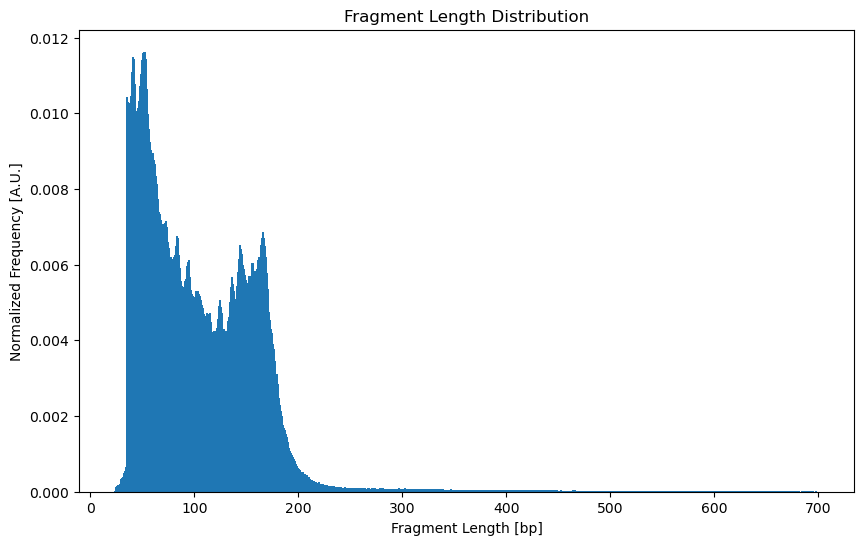

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(normalized_freq.index, normalized_freq.values,width=2.0)
plt.xlabel("Fragment Length [bp]")
plt.ylabel("Normalized Frequency [A.U.]")
plt.title("Fragment Length Distribution")
plt.show()